In [1]:
from pkg import *

In [ ]:
#创建模型并计算水动力
#body = Create_geometry(x=30,y=30,z=4,h=0.9,m=30*30*1.1*1025,nx_distance=30.01,ny_distance=30.01,nx=10,ny=10,dof=6,mesh=4)
#6*6
body = Create_geometry(x=50,y=50,z=4,h=0.9,m=50*50*1.1*1025,nx_distance=50.01,ny_distance=50.01,nx=6,ny=6,dof=6,mesh=4)

In [ ]:
omega = np.linspace(0.1, 2, 20)

In [ ]:
dataset = hydro(body,omega=0.5852,depth=-np.inf,wave_direction=np.pi*5/4,HTM=False,save = False)

In [ ]:
cpt.io.xarray.separate_complex_values(dataset).to_netcdf(f'DMFEM66_5852_direction225_nosprace_m4.nc',
            encoding={'radiating_dof': {'dtype': 'U'},
                        'influenced_dof': {'dtype': 'U'}})

INFO    : New floating body: E:\phd\Code\DM-FEM2D\hydro_output\sphere.dat.


INFO    : New floating body: E:\phd\Code\DM-FEM2D\hydro_output\sphere.dat.
INFO    : The rotation dof Roll has been initialized around the point: E:\phd\Code\DM-FEM2D\hydro_output\sphere.dat.center_of_mass = (0, 0, -2)
INFO    : The rotation dof Pitch has been initialized around the point: E:\phd\Code\DM-FEM2D\hydro_output\sphere.dat.center_of_mass = (0, 0, -2)
INFO    : The rotation dof Yaw has been initialized around the point: E:\phd\Code\DM-FEM2D\hydro_output\sphere.dat.center_of_mass = (0, 0, -2)
INFO    : Clipping E:\phd\Code\DM-FEM2D\hydro_output\sphere.dat with respect to Plane(normal=[0. 0. 1.], point=[0. 0. 0.])
INFO    : Clipping half_of_E:\phd\Code\DM-FEM2D\hydro_output\sphere.dat by Plane(normal=[0. 0. 1.], point=[0. 0. 0.]): no action.
INFO    : Clipping mirrored_of_half_of_E:\phd\Code\DM-FEM2D\hydro_output\sphere.dat by Plane(normal=[0. 0. 1.], point=[0. 0. 0.]): no action.


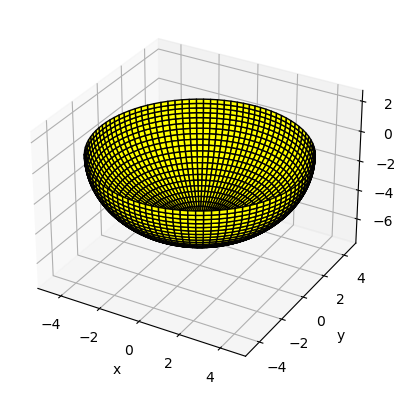

In [39]:
# 读取第三方网格开展计算
mesh = cpt.io.mesh_loaders.load_mesh('E:\phd\Code\DM-FEM2D\hydro_output\sphere.dat', name=None)
body = cpt.FloatingBody(mesh=mesh, center_of_mass=(0,0,-2))
body.add_all_rigid_body_dofs()
body.keep_immersed_part()
body.show_matplotlib()

body.inertia_matrix = body.compute_rigid_body_inertia()
body.hydrostatic_stiffness = body.compute_hydrostatic_stiffness()
import pandas as pd
inertia_matrix_df = pd.DataFrame(body.inertia_matrix.values)
hydrostatic_stiffness_df = pd.DataFrame(body.hydrostatic_stiffness.values)
inertia_matrix_df.to_csv('inertia_matrix_values.csv', index=False)
hydrostatic_stiffness_df.to_csv('hydrostatic_stiffness_values.csv', index=False)


# omega = np.linspace(0.01, 8, 420)
# bem_solver = cpt.BEMSolver()
# problems = [cpt.RadiationProblem(body=body, omega=o,rho=1025,sea_bottom=-50,radiating_dof=dof) for o in omega for dof in body.dofs]
# problems += [cpt.DiffractionProblem(omega=o, body=body,rho=1025,wave_direction=0,sea_bottom=-50) for o in omega]
# result = bem_solver.solve_all(problems,n_jobs=20)
# cpt.io.xarray.separate_complex_values(dataset).to_netcdf(f'self_sphere.nc',
#             encoding={'radiating_dof': {'dtype': 'U'},
#                         'influenced_dof': {'dtype': 'U'}})



In [41]:
# Read the CSV file into a Pandas DataFrame
inertia_matrix_df = pd.read_csv('hydrostatic_stiffness_values.csv')

inertia_matrix_df.values


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  7.69965687e+05,
        -0.00000000e+00,  4.35651515e-12,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         5.12984251e+06,  2.17825757e-12,  4.35651515e-12],
       [ 0.00000000e+00,  0.00000000e+00,  4.35651515e-12,
         2.17825757e-12,  5.12984251e+06, -6.05780903e-09],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])